Q-11. Given the data of a feature contributing to different classes 

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

a. Check whether the distribution of all the classes are the same or not.

b. Check for the equality of variance/

c. Which amount LDA and QDA would perform better on this data for classification and why.

d. Check the equality of mean for between all the classes.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_rel

In [2]:
df=pd.read_csv('data.csv')
df.columns=['Patient ID','Blood Pressure Before (mmHg)','Blood Pressure After (mmHg)']
df

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


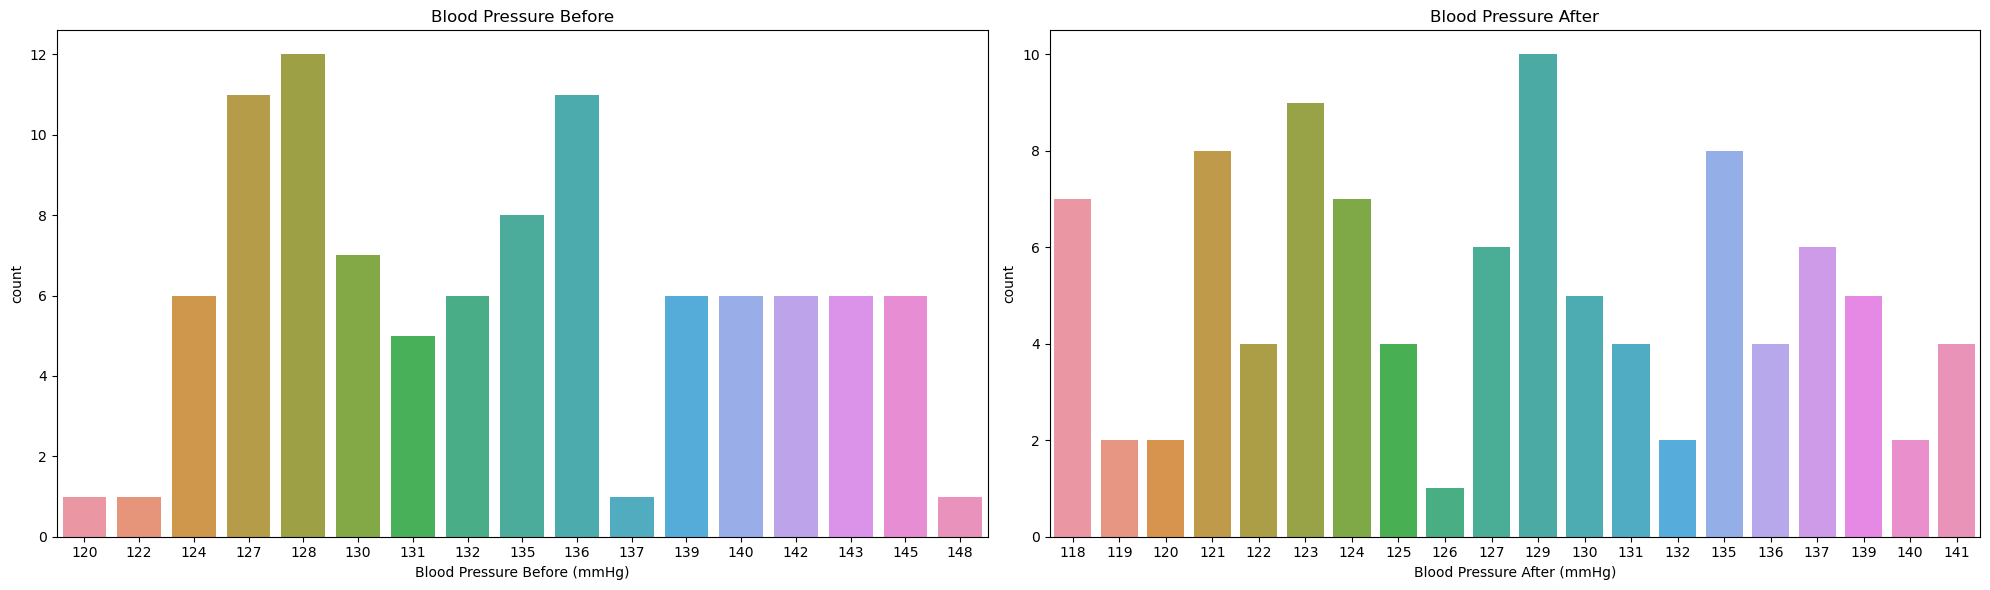

In [3]:

# Check whether the distribution of all the classes are the same or not
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Blood Pressure Before (mmHg)')
plt.title("Blood Pressure Before")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Blood Pressure After (mmHg)')
plt.title("Blood Pressure After")

plt.tight_layout()
plt.show()

In [4]:
statistic_before, p_value_before = shapiro(df['Blood Pressure Before (mmHg)'])
statistic_after, p_value_after = shapiro(df['Blood Pressure After (mmHg)'])

print("Shapiro-Wilk Test for Normality:")
print("Blood Pressure Before - Test Statistic:", statistic_before)
print("Blood Pressure Before - p-value:", p_value_before)
print("Blood Pressure After - Test Statistic:", statistic_after)
print("Blood Pressure After - p-value:", p_value_after)

statistic, p_value = ttest_rel(df['Blood Pressure Before (mmHg)'],df['Blood Pressure After (mmHg)'])
print("Paired t-test:")
print("Test Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test for Normality:
Blood Pressure Before - Test Statistic: 0.9573234915733337
Blood Pressure Before - p-value: 0.002603276167064905
Blood Pressure After - Test Statistic: 0.9400556683540344
Blood Pressure After - p-value: 0.00019430516113061458
Paired t-test:
Test Statistic: 38.40500458621546
p-value: 2.817165090364283e-61


In [5]:
#b. Check for the equality of variance
from scipy.stats import levene, bartlett

def check_variance_equality(data1, data2):
    # Perform Levene's test
    _, p_value_levene = levene(data1, data2)
    
    # Perform Bartlett's test
    _, p_value_bartlett = bartlett(data1, data2)
    
    # Compare p-values to determine variance equality
    if p_value_levene > 0.05 and p_value_bartlett > 0.05:
        result = True
    else:
        result = False
    
    return result, p_value_levene, p_value_bartlett

dataset1 = df['Blood Pressure Before (mmHg)']
dataset2 = df['Blood Pressure After (mmHg)']

equality, p_value_levene, p_value_bartlett = check_variance_equality(dataset1, dataset2)

if equality:
    print("The variances are equal.")
else:
    print("The variances are not equal.")

print("Levene's test p-value:", p_value_levene)
print("Bartlett's test p-value:", p_value_bartlett)


The variances are equal.
Levene's test p-value: 0.6715080090945376
Bartlett's test p-value: 0.6697747425427487


In [6]:
#c Which amount LDA and QDA would perform better on this data for classification and why.
# To find which would perform better on this data we need to create covariance matrix
# We want to know the cov matrix only for BP before and after therefore extract feature 
df1 = df[['Blood Pressure Before (mmHg)','Blood Pressure After (mmHg)']]
cov_matrix = np.cov(df1.T)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[43.53727273 44.44686869]
 [44.44686869 47.44484848]]


* If the covariance matrix is approximately equal across all classes, LDA may be more suitable.
* If the covariance matrix varies significantly across classes, suggesting different spreads or correlations, QDA may be more appropriate.
Here LDA may be more suitable for this dataset

In [7]:
#d Check the equality of mean for between all the classes
import scipy.stats as stats
# Perform the two-sample t-test
statistic, p_value = stats.ttest_ind(df['Blood Pressure Before (mmHg)'],df['Blood Pressure After (mmHg)'])

print("t-statistic:", statistic)
print("p-value:", p_value)

t-statistic: 5.818552457956588
p-value: 2.3565868442709904e-08


The p-value is below the significance level(0.05 or 0.001) that indicate there is a significant difference in means between the two features